Start with a constant velocity expansion, check rescaling for say a circle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import re
import os

In [6]:
plt.rc("axes.spines", right=True, top=True)
plt.rc("figure", dpi=300, 
       figsize=(9, 3)
      )
plt.rc("font", family="serif")
plt.rc("legend", edgecolor="none", frameon=True)

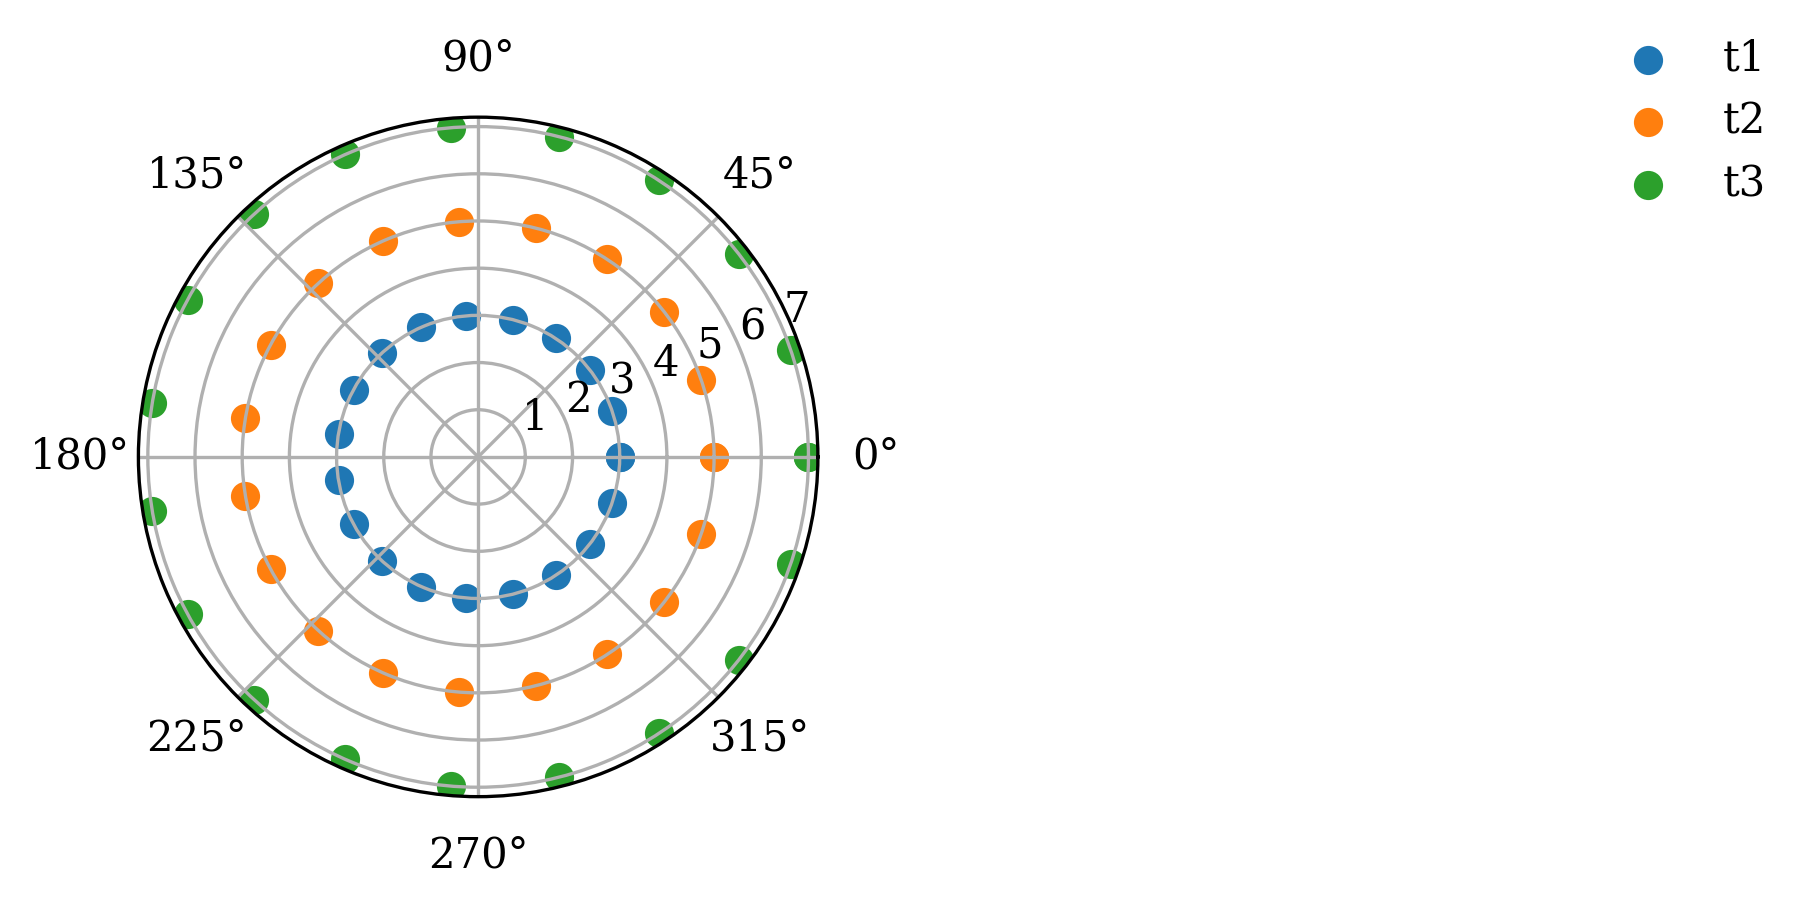

In [7]:
# points on circle move outward at 2 Rs per second
r1 = 3 * np.ones(20)
r2 = 5 * np.ones(20)
r3 = 7 * np.ones(20)

theta = np.linspace(0, 2 * np.pi, 20)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(theta, r1, label="t1")

ax.scatter(theta, r2, label="t2")

ax.scatter(theta, r3, label="t3")


ax.grid(True)

fig.legend()

First rescaling

In [57]:
# changing these values in a uniform manner doesn't do anything, rescaling is still poor. Non-uniform perhaps?
# e.g try 1, 3.5, 6.5 - bad!
# also try 1, 3, 3.5
t1 = 1
t2 = 2
t3 = 3

In [58]:
r_by_t1 = r1 / t1
r_by_t2 = r2 / t2
r_by_t3 = r3 / t3

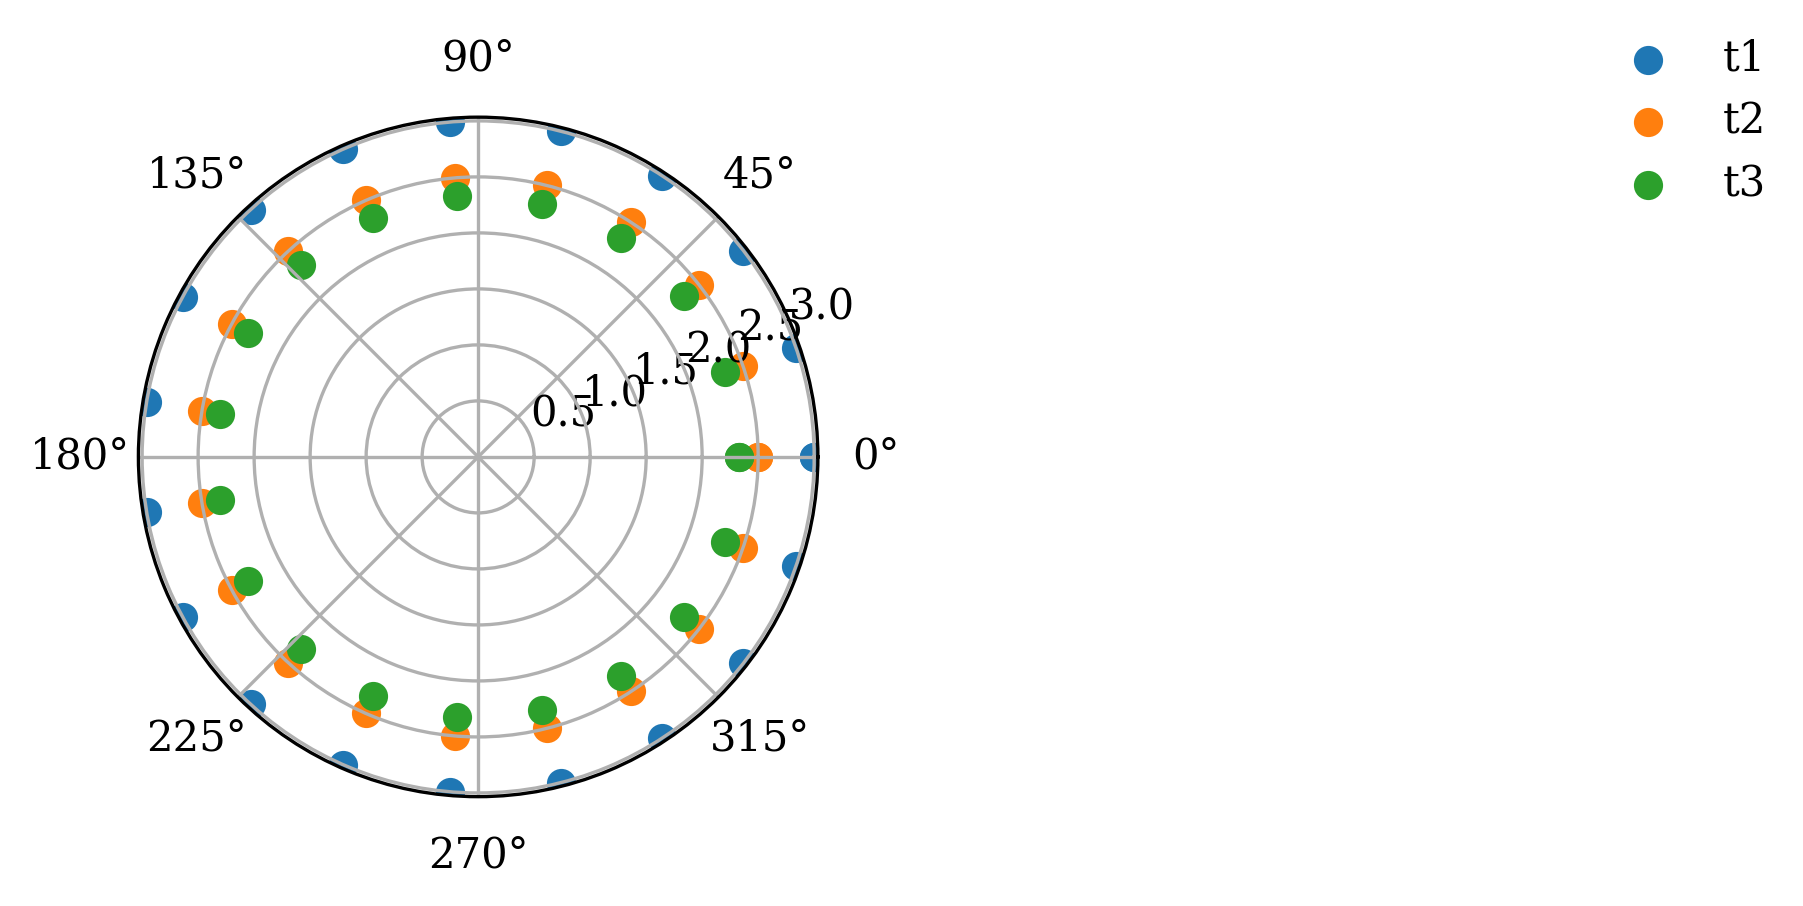

In [59]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(theta, r_by_t1, label="t1")

ax.scatter(theta, r_by_t2, label="t2")

ax.scatter(theta, r_by_t3, label="t3")


ax.grid(True)

fig.legend()

Explore rescaling with different powers of $t$

In [15]:
t_pow_to_try = np.linspace(1, 2.5, 25)
t_pow_to_try

array([1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   ])

In [19]:
r_by_t = np.zeros((3, 20, len(t_pow_to_try)))
for ipp, pp in enumerate(t_pow_to_try):
    r_by_t[0, :, ipp] = r1 / (t1 ** pp)
    r_by_t[1, :, ipp] = r2 / (t2 ** pp)
    r_by_t[2, :, ipp] = r3 / (t3 ** pp)

In [21]:
saveFig=True

In [23]:
for i in range(len(t_pow_to_try)):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.scatter(theta, r_by_t[0, :, i], label="t1")
    ax.scatter(theta, r_by_t[1, :, i], label="t2")
    ax.scatter(theta, r_by_t[2, :, i], label="t3")
    ax.set_title("Power = {}".format(t_pow_to_try[i]))
    ax.grid(True)
    fig.legend()
    if saveFig:
        plt.savefig(os.path.join("./01_CircularExpansion", "t_pow_{:03d}.png".format(i)))
        print("figure saved")
    plt.close()

figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved
figure saved


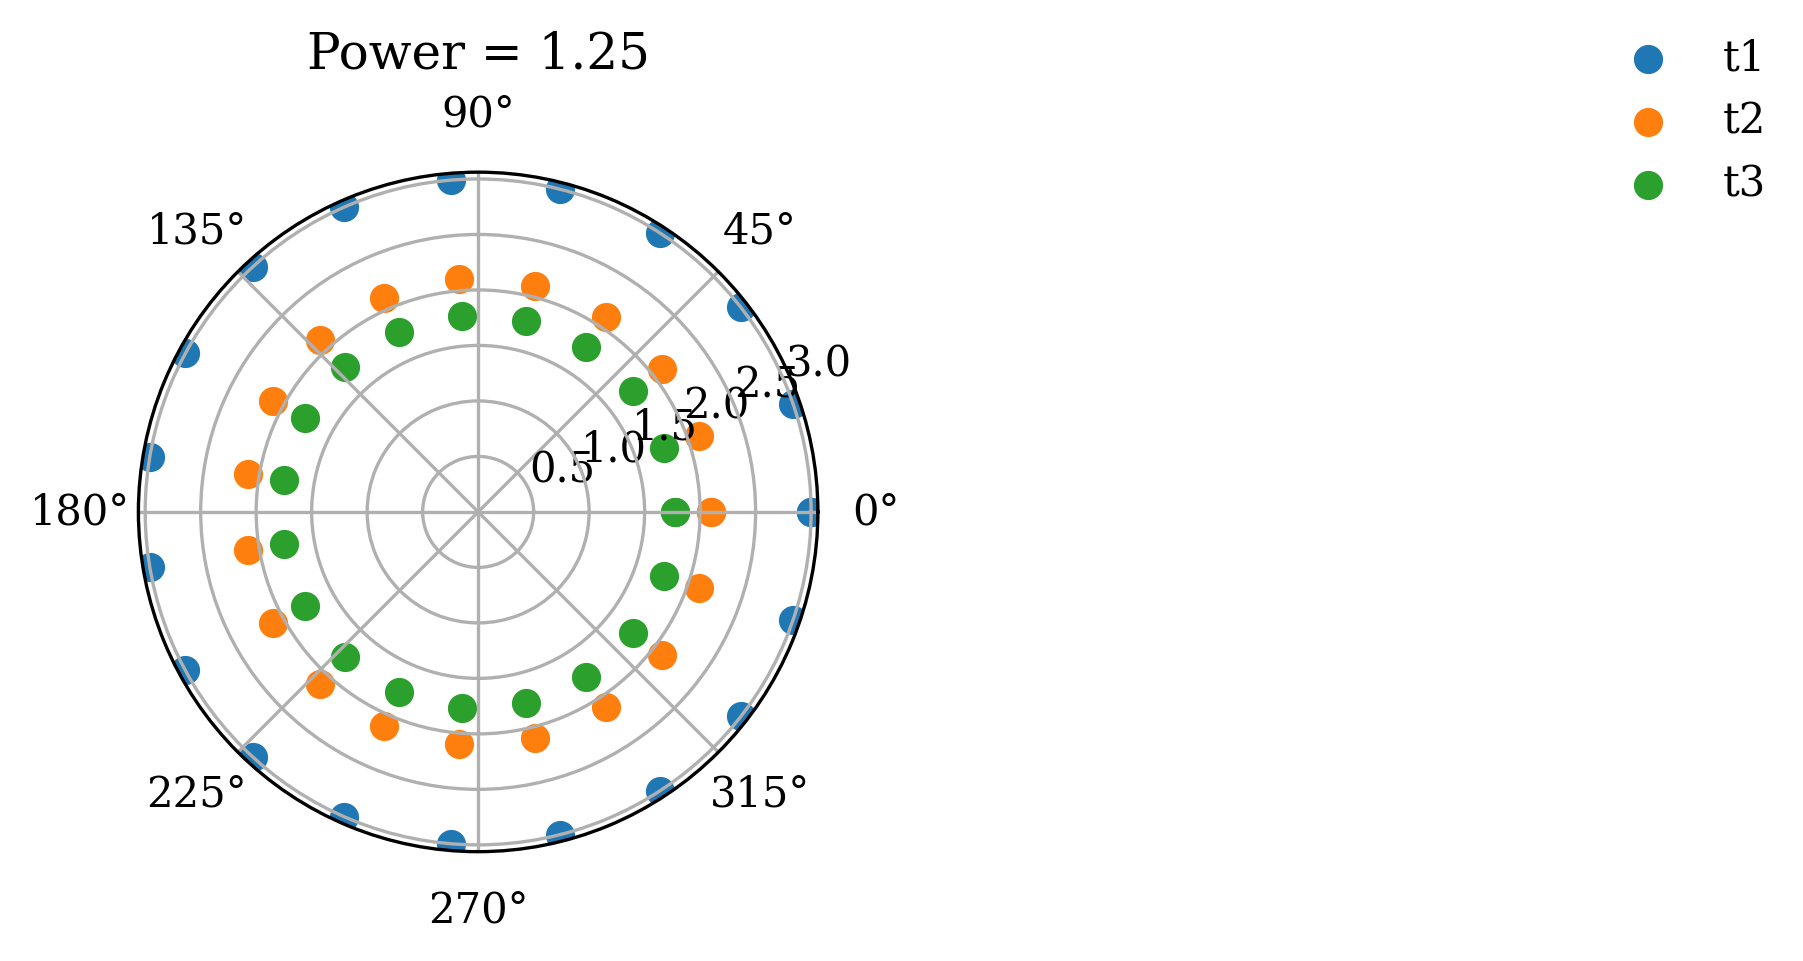

In [24]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.scatter(theta, r_by_t[0, :, 4], label="t1")
ax.scatter(theta, r_by_t[1, :, 4], label="t2")
ax.scatter(theta, r_by_t[2, :, 4], label="t3")
ax.set_title("Power = {}".format(t_pow_to_try[4]))
ax.grid(True)
fig.legend()

Clearly from the above, this kind of rescaling doesn't work for all these powers of $t$, we need to try something else, probably start modelling $dr / dt$?

Now add some interesting details (like decelerating velocity profile?) For example,

$$v(t) = k / t^\beta$$

Let $k=2$, and $\beta=0.7$?

In [ ]:
def v_dec(t_val, k=2, beta=0.7):
    return k / (t_val ** beta)

Exponential Decay based model?

Power law based model?

Now distort this expansion, i.e every angle expands at a slightly different rate (define some parameter we can control for this). Can we recover or learn the true rate in a data-driven manner?